In [89]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [90]:
# The starter code is short and simple, take a look!
from starter import *

import random

# Phase 1 - Create Inputs

In [91]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

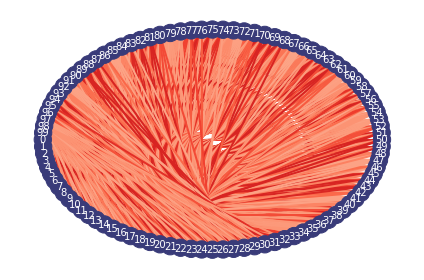

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

In [92]:
G = nx.empty_graph(N_SMALL)
small(G)
visualize(G)
write_input(G, 'inputs/small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
visualize(G)
write_input(G, 'inputs/medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
visualize(G)
write_input(G, 'inputs/large.in')

# Phase 2 - Implement your Solver

In [181]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(1, G.number_of_nodes())
    for v in G.nodes:
        G.nodes[v]['team'] = random.randint(1, k)

In [182]:
def max_cut_solve(G: nx.Graph):
    """Simple Max 2-Cut Approach: Sahni and Gonzalez, 1976"""
    k = 2
    team1 = []
    team2 = []
    for v in G.nodes:
        if potential_change(G, team1, team2, v):
            team1.append(v)
            G.nodes[v]['team'] = 1
        else:
            team2.append(v)
            G.nodes[v]['team'] = 2

def potential_change(G, team1, team2, v):
    """Returns True iff cut with v in team1 is greater than or equal to cut with v in team2."""
    v_into_team1 = 0
    v_into_team2 = 0
    for u in team1:
        v_into_team2 += sum(d for i, j, d in G.edges(data='weight') if (i == u and j == v) or (i == v and j == u))
    for u in team2:
        v_into_team1 += sum(d for i, j, d in G.edges(data='weight') if (i == u and j == v) or (i == v and j == u))
    return v_into_team1 >= v_into_team2


In [183]:
def optimize_k(G: nx.Graph):
    """Searches for the optimal k for a given graph G."""

    # TODO: Save time by finding k by with binary search, instead of incrementing it up by 1 each time

    G_copy = G.copy()

    k = 2
    max_k_cut_solve(k)(G_copy)
    validate_output(G_copy)
    minimum_score = score(G_copy)
    best_k = 2
    #print("Score:", minimum_score, "k:", k)

    increase_k = True

    while increase_k:
        G_copy = G.copy()
        k += 1
        max_k_cut_solve(k)(G_copy)
        validate_output(G_copy)
        current_score = score(G_copy)
        #print("Score:", current_score, "k:", k)
        if current_score < minimum_score:
            best_k = k
            minimum_score = current_score
        else:
            increase_k = False
    
    return best_k

# TODO: try the more obvious approach of trying to minimize within the partition, instead of trying to maximize outside of the partition

def max_k_cut_solve(k):
    """Returns a function that approximates max-k cut."""
    teams = [[] for _ in range(k)]
    not_in_teams = [[] for _ in range(k)]
    def max_k_cut_helper(G: nx.Graph):
        for v in G.nodes:
            i = potential_change(G, teams, not_in_teams, v)
            teams[i].append(v)
            for j in range(len(not_in_teams)):
                if j != i:
                    not_in_teams[j].append(v)
            G.nodes[v]['team'] = i + 1
    return max_k_cut_helper

def potential_change(G, teams, not_in_teams, v):
    """Returns the index of the team that would maximize the cut if v is placed into that team."""
    v_into_teams = [0 for _ in range(len(teams))]
    for t in range(len(teams)):
        v_into_teams[t] += sum(d for i, j, d in G.edges(data='weight') if (i == v and j in not_in_teams[t]) or (j == v and i in not_in_teams[t]))
    return max([l for l in range(len(teams))], key=lambda l: v_into_teams[l])

In [184]:
# Assign a team to v with G.nodes[v]['team'] = team_id
# Access the team of v with team_id = G.nodes[v]['team']

def solve(G: nx.Graph):
    
    # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
    # TODO: Decrease the amount of nodes updated as time goes on
    # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    max_k_cut_solve(k)(G)
    validate_output(G)

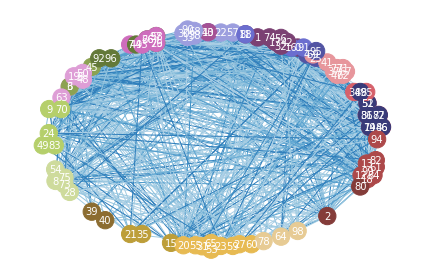

random_solve 1.4276838118129203e+19


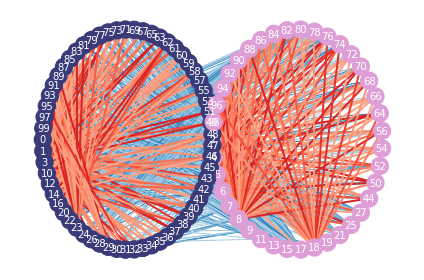

solve 210929.3371690421


In [185]:
solvers = [random_solve, solve]

for solver in solvers:
    G = read_input('inputs/small.in')
    solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))


In [186]:
run(max_k_cut_solve(10), 'inputs/small.in', 'outputs/small.out', True)

inputs/small.in: cost 301999327631.43866


In [187]:
# TODO: record the best solutions by only saving if the score is only than the previous best for that file

run_all(solve, 'inputs', 'outputs', True)
tar('outputs', True)

  0%|          | 0/4 [00:00<?, ?it/s]

inputs/medium.in: cost 50239.61811653117
inputs/example.in: cost 1219.2493960703473
inputs/large.in: cost 17663.636220431
inputs/small.in: cost 210929.3371690421
